# Financial Data Structure

Before executing the code below, you need create an account in Kaggle and create an API key. When executing the `od.download`, you will be asked for both the username and the API key. The code downloads historical data regarding SP500 companies.

In [1]:
import opendatasets as od
import pandas as pd

In [2]:
# Download the S&P500 data
od.download("https://www.kaggle.com/datasets/camnugent/sandp500/download?datasetVersionNumber=4")

Skipping, found downloaded files in "./sandp500" (use force=True to force download)


In [3]:
# Read the data from a csv-file into a Panda data-frame
df = pd.read_csv('./sandp500/all_stocks_5yr.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [4]:
# Show information regarding the data-frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [5]:
# Plot all unique names
df['Name'].unique()

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

In [6]:
# Show the number of unique names in the data-frame
df['Name'].unique().shape

(505,)

In [7]:
# Filter IBM only
ibm = df[df['Name'] == 'IBM']
ibm.head()

,date,open,high,low,close,volume,Name
290491,2013-02-08,199.97,202.090,199.68,201.68,2893254,IBM
290492,2013-02-11,200.98,201.950,199.75,200.16,2944651,IBM
290493,2013-02-12,200.01,200.735,199.02,200.04,2461779,IBM
290494,2013-02-13,200.65,200.950,199.57,200.09,2169757,IBM
290495,2013-02-14,199.73,200.320,199.26,199.65,3294126,IBM


<AxesSubplot: >

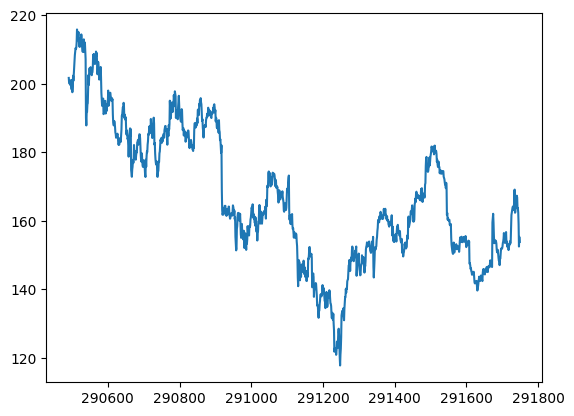

In [8]:
# Plot IBM closing prices
ibm['close'].plot()

In [9]:
# Query for min- and max dates
df['date'].min(), df['date'].max()

('2013-02-08', '2018-02-07')

In [10]:
dates = pd.date_range(df['date'].min(), df['date'].max())
dates

DatetimeIndex(['2013-02-08', '2013-02-09', '2013-02-10', '2013-02-11',
               '2013-02-12', '2013-02-13', '2013-02-14', '2013-02-15',
               '2013-02-16', '2013-02-17',
               ...
               '2018-01-29', '2018-01-30', '2018-01-31', '2018-02-01',
               '2018-02-02', '2018-02-03', '2018-02-04', '2018-02-05',
               '2018-02-06', '2018-02-07'],
              dtype='datetime64[ns]', length=1826, freq='D')

In [11]:
# Create a DataFrame that has date as rows and closing price as columns
df2 = pd.DataFrame(data=ibm['close'].to_numpy(), index=pd.to_datetime(ibm['date']), columns=['IBM'])
df2.head()

,IBM
date,
2013-02-08,201.68
2013-02-11,200.16
2013-02-12,200.04
2013-02-13,200.09
2013-02-14,199.65


In [12]:
# We want to have a table where we have the date on the first column and the closing share prices of
# the different S&P500 companies on the following columns.

symbols = df['Name'].unique()
closing_prices = pd.DataFrame(index=pd.to_datetime(dates))

# Iterate over the rest of the tickers
for symbol in symbols:
    ticker = df[df['Name'] == symbol]
    tmp = pd.DataFrame(data=ticker['close'].to_numpy(), index=pd.to_datetime(ticker['date']), columns=[symbol])
    closing_prices = closing_prices.join(tmp)

# The NaN:s in the table below are caused by the days when the stock-market was closed.
closing_prices.head()

,AAL,AAPL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,...,XLNX,XL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
2013-02-08,14.75,67.8542,78.90,36.25,46.89,34.41,73.31,39.12,45.70,30.22,...,37.51,28.24,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-11,14.46,68.5614,78.39,35.85,46.76,34.26,73.07,38.64,46.08,30.28,...,37.46,28.31,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2013-02-12,14.27,66.8428,78.60,35.42,46.96,34.30,73.37,38.89,46.27,30.81,...,37.58,28.41,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74


In [13]:
# Show information regarding the closing_prices data-frame
closing_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2013-02-08 to 2018-02-07
Freq: D
Columns: 505 entries, AAL to ZTS
dtypes: float64(505)
memory usage: 7.1 MB


In [14]:
# Save the data-frame
closing_prices.to_csv('sp500_closing_prices.csv')

In [15]:
!head sp500_closing_prices.csv

,AAL,AAPL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,ADS,AEE,AEP,AES,AET,AFL,AGN,AIG,AIV,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALLE,ALL,ALXN,AMAT,AMD,AME,AMGN,AMG,AMP,AMT,AMZN,ANDV,ANSS,ANTM,AON,AOS,APA,APC,APD,APH,APTV,ARE,ARNC,ATVI,AVB,AVGO,AVY,AWK,AXP,AYI,AZO,A,BAC,BAX,BA,BBT,BBY,BDX,BEN,BF.B,BHF,BHGE,BIIB,BK,BLK,BLL,BMY,BRK.B,BSX,BWA,BXP,CAG,CAH,CAT,CA,CBG,CBOE,CBS,CB,CCI,CCL,CDNS,CELG,CERN,CFG,CF,CHD,CHK,CHRW,CHTR,CINF,CI,CLX,CL,CMA,CMCSA,CME,CMG,CMI,CMS,CNC,CNP,COF,COG,COL,COO,COP,COST,COTY,CPB,CRM,CSCO,CSRA,CSX,CTAS,CTL,CTSH,CTXS,CVS,CVX,CXO,C,DAL,DE,DFS,DGX,DG,DHI,DHR,DISCA,DISCK,DISH,DIS,DLR,DLTR,DOV,DPS,DRE,DRI,DTE,DUK,DVA,DVN,DWDP,DXC,D,EA,EBAY,ECL,ED,EFX,EIX,EL,EMN,EMR,EOG,EQIX,EQR,EQT,ESRX,ESS,ES,ETFC,ETN,ETR,EVHC,EW,EXC,EXPD,EXPE,EXR,FAST,FBHS,FB,FCX,FDX,FE,FFIV,FISV,FIS,FITB,FLIR,FLR,FLS,FL,FMC,FOXA,FOX,FRT,FTI,FTV,F,GD,GE,GGP,GILD,GIS,GLW,GM,GOOGL,GOOG,GPC,GPN,GPS,GRMN,GS,GT,GWW,HAL,HAS,HBAN,HBI,HCA,HCN,HCP,HD,HES,HIG,HII,HLT,HOG,HOLX,HON,HPE,HPQ,HP,HRB,HRL,HRS,HSIC,HST,HSY,HUM,IBM

In [16]:
# Read in a csv file. Set the index so that it uses 'date' as index.
closing_prices2 = pd.read_csv('sp500_closing_prices.csv', index_col=0, parse_dates=True)
closing_prices2.head()

,AAL,AAPL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,...,XLNX,XL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
2013-02-08,14.75,67.8542,78.90,36.25,46.89,34.41,73.31,39.12,45.70,30.22,...,37.51,28.24,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-11,14.46,68.5614,78.39,35.85,46.76,34.26,73.07,38.64,46.08,30.28,...,37.46,28.31,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2013-02-12,14.27,66.8428,78.60,35.42,46.96,34.30,73.37,38.89,46.27,30.81,...,37.58,28.41,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74


In [17]:
closing_prices2.head()

,AAL,AAPL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,...,XLNX,XL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
2013-02-08,14.75,67.8542,78.90,36.25,46.89,34.41,73.31,39.12,45.70,30.22,...,37.51,28.24,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
2013-02-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-11,14.46,68.5614,78.39,35.85,46.76,34.26,73.07,38.64,46.08,30.28,...,37.46,28.31,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2013-02-12,14.27,66.8428,78.60,35.42,46.96,34.30,73.37,38.89,46.27,30.81,...,37.58,28.41,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74


<AxesSubplot: >

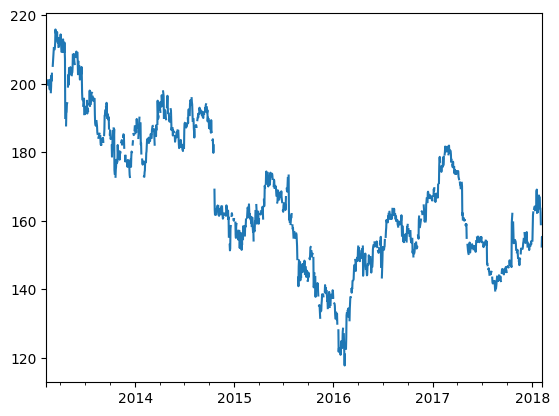

In [18]:
closing_prices2['IBM'].plot()

In [19]:
# Deal with NaN:s
# 1. Remove rows that contain only NaN:s. These are days when the stock market was closed
# 2. Fill in using forward-filling
# 3. Fill in using backward-filling

# 1. Remove rows that contain only NaN:s
closing_prices.dropna(axis=0, how='all', inplace=True)

# Check how many missing numbers are still in the dataset
closing_prices.isna().sum().sum()

16755

In [20]:
# 2. Fill in using forward-fill
closing_prices.fillna(method='ffill', inplace=True)
closing_prices.isna().sum().sum()

16704

In [21]:
# 3. Fill in using backwards-fill
closing_prices.fillna(method='bfill', inplace=True)
closing_prices.isna().sum().sum()

0

<AxesSubplot: >

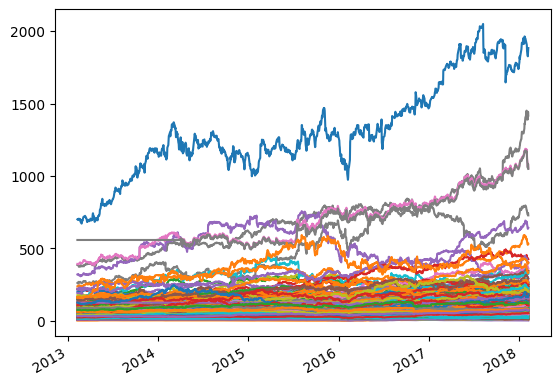

In [22]:
closing_prices.plot(legend=False)

<AxesSubplot: >

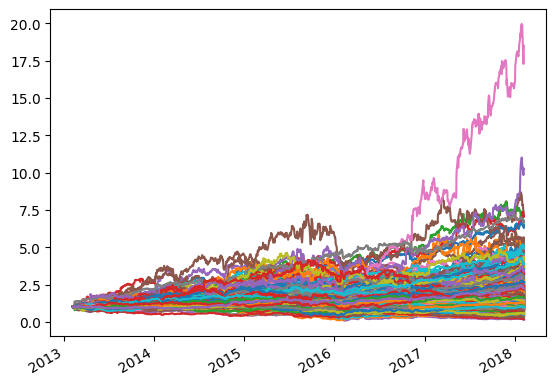

In [23]:
# Normalize the closing prices based on the initial values in order to evaluate 'gains'
closing_prices_normalized = closing_prices / closing_prices.iloc[0]
closing_prices_normalized.plot(legend=False)

In [24]:
# Query which stock has gained the most during the period
closing_prices_normalized.iloc[-1].idxmax()

'NVDA'

In [42]:
# Query which 10 stocks have gained the most during the period
temp = closing_prices_normalized
for _ in range(10):
    best = temp.iloc[-1].idxmax()
    print(best)
    temp.drop(labels=best, axis=1, inplace=True)
    

NVDA
NFLX
ALGN
EA
STZ
AVGO
FB
MU
AMZN
ATVI
